In [61]:
# Rodrigo Caye Daudt
# rodrigo.cayedaudt@geod.baug.ethz.ch
# 04/2021

%matplotlib inline
import numpy as np
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import os
from glob import glob
import torch
from tqdm import tqdm

from EuroSAT_dataset import EuroSAT
from network import Net
from torchvision.utils import make_grid


%load_ext autoreload
%autoreload 2


if not os.path.exists('./outputs'):
    os.mkdir('./outputs')

print('Imports OK')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Imports OK


In [2]:
# Global parameters

# If USE_CUDA is True, computations will be done using the GPU (may not work in all systems)
# This will make the calculations happen faster
USE_CUDA = torch.cuda.is_available() 

DATASET_PATH = '../EuroSAT_data'

BATCH_SIZE = 32 # Number of images that are used for calculating gradients at each step

NUM_EPOCHS = 10 # Number of times we will go through all the training images. Do not go over 25

LEARNING_RATE = 1e-3 # Controls the step size
MOMENTUM = 0.0 # Momentum for the gradient descent
WEIGHT_DECAY = 1e-6 # Regularization factor to reduce overfitting


print('Parameters OK')

Parameters OK


In [3]:
# Create datasets and data loaders
train_dataset = EuroSAT(DATASET_PATH, True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

test_dataset = EuroSAT(DATASET_PATH, False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)


print('Dataloaders OK')


EuroSAT dataset (train) created successfully with 21600 images.

EuroSAT dataset (test) created successfully with 5400 images.
Dataloaders OK


In [4]:
# Create network
net = Net()
if USE_CUDA:
    net = net.cuda()

print('Network OK')

Network OK


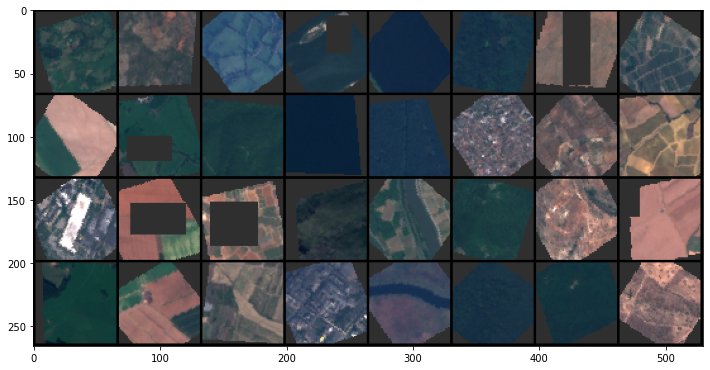

In [93]:
plt.rcParams["savefig.bbox"] = 'tight'
def visualize_batch(batch):
    imgs = (batch['image'].detach().cpu() + 0) / 1
    labels = batch['label']
    plt.figure(figsize=(12, 20))
    grid = make_grid(imgs, nrow=8, padding=2, normalize=True)
    plt.imshow(grid.permute(1, 2, 0), )
    plt.show()


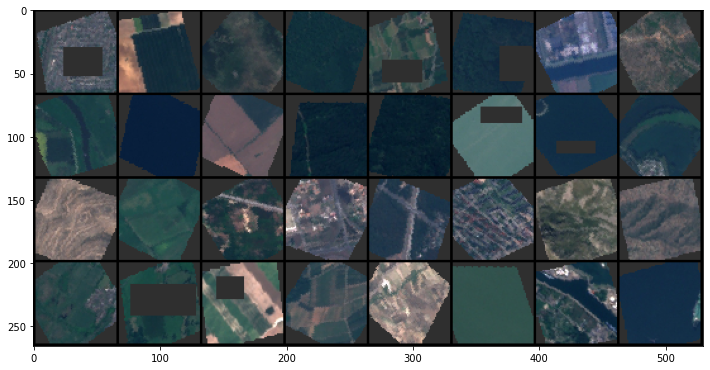

In [94]:
for i, x in enumerate(train_loader):
    visualize_batch(x)
    break

In [7]:
# Criterion, optimizer, and scheduler

criterion = torch.nn.CrossEntropyLoss() # Do not change this
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

In [8]:
# Helper function to organize main loop
# This function is called for training and for testing at each epoch

def run_epoch(net, optimizer, dataloader, criterion, train=True, cuda=USE_CUDA):
    epoch_total_loss = 0
    epoch_total_samples = 0
    epoch_total_correct = 0

    for sample in tqdm(dataloader):
        img = sample['image']
        label = sample['label']

        if cuda:
            img, label = img.cuda(), label.cuda()

        if train:
            optimizer.zero_grad()
        out = net(img)
        loss = criterion(out, label)
        if train:
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            epoch_total_samples += img.size(0)
            epoch_total_loss += img.size(0) * loss
            epoch_total_correct += torch.sum(torch.argmax(out, dim=1) == label)

    return epoch_total_loss / epoch_total_samples, epoch_total_correct / epoch_total_samples




Running epoch 1 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:11<00:00, 15.34it/s]



Epoch 1 validation results: Loss=2.2323038578033447 | Accuracy=0.11685185134410858



Running epoch 2 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:10<00:00, 16.30it/s]



Epoch 2 validation results: Loss=2.1420912742614746 | Accuracy=0.2092592567205429



Running epoch 3 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:09<00:00, 18.11it/s]



Epoch 3 validation results: Loss=2.1078717708587646 | Accuracy=0.2320370376110077



Running epoch 4 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:07<00:00, 23.56it/s]



Epoch 4 validation results: Loss=2.075613498687744 | Accuracy=0.24722221493721008



Running epoch 5 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:09<00:00, 18.34it/s]



Epoch 5 validation results: Loss=2.034661293029785 | Accuracy=0.2616666555404663



Running epoch 6 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:08<00:00, 19.36it/s]



Epoch 6 validation results: Loss=1.9490869045257568 | Accuracy=0.26814815402030945



Running epoch 7 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:06<00:00, 28.12it/s]



Epoch 7 validation results: Loss=1.8148843050003052 | Accuracy=0.2875925898551941



Running epoch 8 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:07<00:00, 22.77it/s]



Epoch 8 validation results: Loss=1.7545193433761597 | Accuracy=0.32462963461875916



Running epoch 9 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:07<00:00, 23.84it/s]



Epoch 9 validation results: Loss=1.724067211151123 | Accuracy=0.330740749835968



Running epoch 10 of 10...



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:06<00:00, 27.74it/s]



Epoch 10 validation results: Loss=1.6811167001724243 | Accuracy=0.3444444537162781



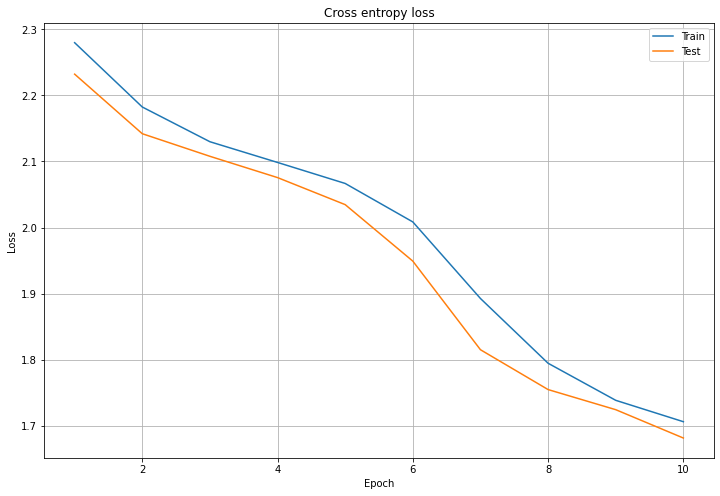

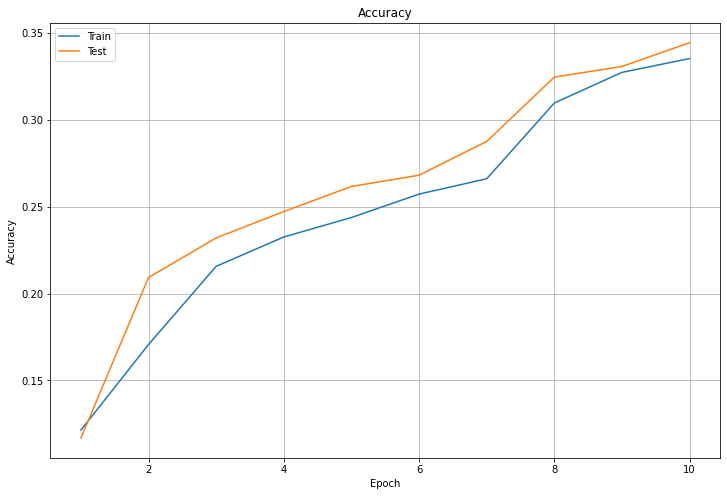

In [9]:
# Main loop

train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []
epochs = []

for epoch in range(1, NUM_EPOCHS+1):
    print(f'\n\nRunning epoch {epoch} of {NUM_EPOCHS}...\n')
    epochs.append(epoch)

    # Train
    net.train()
    loss, accuracy = run_epoch(net, optimizer, train_loader, criterion, train=True)
    train_loss.append(loss.cpu())
    train_accuracy.append(accuracy.cpu())


    # Test
    net.eval()
    with torch.no_grad():
        loss, accuracy = run_epoch(net, optimizer, test_loader, criterion, train=False)
    test_loss.append(loss.cpu())
    test_accuracy.append(accuracy.cpu())
    print(f'\nEpoch {epoch} validation results: Loss={loss.cpu()} | Accuracy={accuracy.cpu()}\n')


    # Plot and save
    plt.figure(figsize=(12, 8), num=1)
    plt.clf()
    plt.plot(epochs, train_loss, label='Train')
    plt.plot(epochs, test_loss, label='Test')
    plt.legend()
    plt.grid()
    plt.title('Cross entropy loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.savefig('outputs/01-loss.pdf')

    plt.figure(figsize=(12, 8), num=2)
    plt.clf()
    plt.plot(epochs, train_accuracy, label='Train')
    plt.plot(epochs, test_accuracy, label='Test')
    plt.legend()
    plt.grid()
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.savefig('outputs/02-accuracy.pdf')

    



In [ ]:
print(f'Final train loss: {train_loss[-1]}')
print(f'Final test loss: {test_loss[-1]}')
print(f'Final train accuracy: {train_accuracy[-1]}')
print(f'Final test accuracy: {test_accuracy[-1]}')